In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12.,6.)})
sns.set_style('whitegrid')

In [3]:
lacrosse = pd.read_excel("./data/lacrosse.xlsx")

In [4]:
lacrosse.head()

,Rank,Team,Conference,Record,Road,Neutral,Home,Non DIV - I
0,1,Northwestern,Big Ten,21-1,5-1,4-0,12-0,0-0
1,2,Boston College,ACC,19-4,5-2,4-2,10-0,0-0
2,3,Syracuse,ACC,18-3,5-0,1-2,12-1,0-0
3,4,Denver,Big East,22-1,10-0,3-1,9-0,0-0
4,5,North Carolina,ACC,16-5,4-2,4-2,8-1,0-0


In [5]:
df = lacrosse.drop(['Record', 'Road', 'Neutral', 'Home', 'Non DIV - I'], axis = 1)

In [6]:
#Starting web scrapping

In [7]:
#In this function we use web scrapping to get and transform a table from a url to a dataframe

def get_transform_table (url):
    res = requests.get(url).content
    soup = BeautifulSoup(res, "html.parser")
    table = soup.find("table")
    table_html = str(table)
    df_variable = pd.read_html(table_html)[0] 
    
    return df_variable

# Using only pd.read_html(table_html) returns a list of df with all the tables in the page
# To access the first (and only) table on the page we add the [0] so we can work with the table as df
# this function will only work for pages with one table

In [8]:
#In case there is a table that is splitted in three pages we use this function to create a single data frame
def combined_dataframe(url_list):
    combined_df = pd.DataFrame()
    for url in url_list:
        df_variable = get_transform_table(url)
        combined_df = pd.concat([combined_df, df_variable], ignore_index=True)
        combined_df = combined_df.drop(['Rank'], axis = 1) #We want to avoid the duplication of the Rank column on the merge

    return combined_df

In [29]:
#TURNOVERS

url_list_to = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/264" , 
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/264/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/264/p3"]
turnovers = combined_dataframe(url_list_to)

def transform_turnovers (turnovers):
    turnovers = turnovers.drop(['Caused TOs'], axis = 1, inplace = True)
    turnovers = turnovers.rename(columns={'Per Game': 'Turnovers x game'})
    return turnovers

In [30]:
#DRAW CONTROLS


url_list_dc = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1209", 
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1209/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1209/p3"]
draw_controls = combined_dataframe(url_list_dc)

def transform_draw_controls(draw_controls):
    draw_controls = draw_controls.drop(['Draw Controls','Opp DC'], axis = 1, inplace = True)
    draw_controls = draw_controls.rename(columns={'Pct.': '% Draw Controls'})
    return draw_controls

In [31]:
#CLEARS

url_list_clears = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1210", 
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1210/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1210/p3"]
clears = combined_dataframe(url_list_clears)

def transform_clears(clears):
    clears = clears.drop(['Clears','Clr Att'], axis = 1, inplace = True)
    clears = clears.rename(columns={'Pct.': '% Clears'})
    return transform_clears

In [32]:
#SAVES

url_list_saves = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/959", 
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/959/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/959/p3"]
saves = combined_dataframe(url_list_saves)


def transform_saves(saves):
    saves = saves.drop(['Team Min','Goals Allowed', 'Saves'], axis = 1, inplace = True)
    saves = saves.rename(columns={'Pct.': '% Saves'})
    return saves

In [33]:
#FREE POSITIONS

url_list_fp = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1082",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1082/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1082/p3"]
free_positions = combined_dataframe(url_list_fp)

def tranform_free_positions(free_positions):
    free_positions = free_positions.drop(['Freepos Goals','Freepos Shots'], axis = 1, inplace = True)
    free_positions = free_positions.rename(columns={'Pct.': '% Free positions'})
    return free_positions

In [34]:
#FOULS

url_list_fouls = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1186",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1186/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1186/p3"]
fouls = combined_dataframe(url_list_fouls)

def transform_fouls(fouls):
    fouls = fouls.drop(['Fouls'], axis = 1, inplace = True)
    fouls = fouls.rename(columns={'Per Game': 'Fouls x game'})
    return fouls

In [36]:
#GROUND BALLS

url_list_gb = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/245",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/245/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/245/p3"]
ground_balls = combined_dataframe(url_list_gb)

def transform_ground_balls(ground_balls):
    ground_balls = ground_balls.drop(['Ground Balls'], axis = 1, inplace = True)
    ground_balls = ground_balls.rename(columns={'Per Game': 'Ground balls x game'})
    return ground_balls

In [16]:
#SCORING DEFFENSE (goals allowed / games played)

url_list_sd = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/247",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/247/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/247/p3"]
scoring_deffense = combined_dataframe(url_list_sd)

def transform_scoring_deffense(scoring_deffense)
    scoring_deffense = scoring_deffense.drop(['Goals Allowed'], axis = 1, inplace = True)
    scoring_deffense = scoring_deffense.rename(columns={'Per Game': 'Goals allowed x game'})
    return scoring_deffense

In [17]:
#SCORING OFFENSE (goals scored / games played)

url_list_so = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/246",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/246/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/246/p3"]
scoring_offense = combined_dataframe(url_list_so)

scoring_offense = df_so.drop(['Goals'], axis = 1, inplace = True)
scoring_offense = df_so.rename(columns={'Per Game': 'Goals x game'})

In [22]:
#SHOT PERCENTAGE (goals scored / shoots)

url_list_sp = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1158",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1158/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1158/p3"]
shot_pct = combined_dataframe(url_list_sp)
shot_pct = df_sp.drop(['Goals', 'Shots'], axis = 1, inplace = True)
shot_pct = df_sp.rename(columns={'Pct.': '% Shots'})

In [23]:
#SHOT x GAME

url_list_sg = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1160",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1160/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1160/p3"]
shots_per_game = combined_dataframe(url_list_sg)
shots_per_game = df_sg.drop(['Shots'], axis = 1, inplace = True)
shots_per_game = df_sg.rename(columns={'Per Game': 'Shots x game'})

In [24]:
#SHOTS ON GOAL x GAME

url_list_sog = ["https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1162",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1162/p2",
            "https://www.ncaa.com/stats/lacrosse-women/d1/current/team/1162/p3"]
shots_on_goal_per_game = combined_dataframe(url_list_sog)
shots_on_goal_per_game = df_sog.drop(['SOG'], axis = 1, inplace = True)
shots_on_goal_per_game = df_sog.rename(columns={'Per Game': 'Shots on goal x game'})

In [26]:
#Now let's join all variables to create a single dataframe to work with
dataframes = [turnovers,draw_controls, clears, saves, free_positions, fouls, ground_balls,
                     scoring_deffense, scoring_offense, shot_pct, shots_per_game, shots_on_goal]

merged_df = dataframes[0]  # Initialize with the first dataframe

for dataframe in dataframes[1:]:
    merged_df = merged_df.merge(dataframe, on=['Team', 'Games'], how = 'outer')

merged_df

,Team,Games,Caused TOs,Per Game_x,Draw Controls,Opp DC,Pct._x,Clears,Clr Att,Pct._y,...,Per Game_y,Goals_x,Per Game_x,Goals_y,Shots_x,Pct.,Shots_y,Per Game_y,SOG,Per Game
0,Campbell,19,268.0,14.11,292.0,255.0,0.534,288.0,326.0,0.883,...,10.95,269.0,14.16,269.0,585.0,0.460,585.0,30.79,442.0,23.26
1,Denver,23,291.0,12.65,308.0,192.0,0.616,422.0,476.0,0.887,...,6.22,274.0,11.91,274.0,655.0,0.418,655.0,28.48,505.0,21.96
2,Liberty,19,237.0,12.47,296.0,232.0,0.561,280.0,344.0,0.814,...,10.42,271.0,14.26,271.0,621.0,0.436,621.0,32.68,454.0,23.89
3,Vermont,16,199.0,12.44,196.0,215.0,0.477,260.0,297.0,0.875,...,10.19,188.0,11.75,188.0,443.0,0.424,443.0,27.69,327.0,20.44
4,Mercer,20,246.0,12.30,338.0,239.0,0.586,299.0,333.0,0.898,...,9.40,328.0,16.40,328.0,667.0,0.492,667.0,33.35,535.0,26.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Delaware St.,16,87.0,5.44,187.0,209.0,0.472,157.0,206.0,0.762,...,14.00,122.0,7.62,122.0,361.0,0.338,361.0,22.56,255.0,15.94
117,Colgate,15,79.0,5.27,223.0,199.0,0.528,240.0,288.0,0.833,...,14.60,150.0,10.00,150.0,413.0,0.363,413.0,27.53,306.0,20.40
118,George Mason,15,76.0,5.07,209.0,198.0,0.514,186.0,218.0,0.853,...,15.20,124.0,8.27,124.0,341.0,0.364,341.0,22.73,243.0,16.20
119,California,18,91.0,5.06,234.0,243.0,0.491,251.0,308.0,0.815,...,13.22,176.0,9.78,176.0,451.0,0.390,451.0,25.06,339.0,18.83


In [ ]:
merged_df = merged_df.rename(columns = )

In [ ]:
columns_to_keep = ["Team", "Games", "Turnovers x game", "% Draw Controls", "% Saves", "% Clears","% Free positions", "Fouls x game", "Ground balls x game", "Goals allowed x game", "Goals x game", "% Shots", "Shots x game", "Shots on goal x game"]


# Use the drop method to drop all columns except the ones specified in columns_to_keep
df = df.drop(columns=df.columns.difference(columns_to_keep))
In this code:

In [ ]:
turnovers = df_to.drop(['Caused TOs'], axis = 1, inplace = True)
turnovers = df_to.rename(columns={'Per Game': 'Turnovers x game'})
draw_controls = df_dc.drop(['Draw Controls','Opp DC'], axis = 1, inplace = True)
draw_controls = df_dc.rename(columns={'Pct.': '% Draw Controls'})
clears = df_clears.drop(['Clears','Clr Att'], axis = 1, inplace = True)
clears = df_clears.rename(columns={'Pct.': '% Clears'})
saves = df_saves.drop(['Team Min','Goals Allowed', 'Saves'], axis = 1, inplace = True)
saves = df_saves.rename(columns={'Pct.': '% Saves'})
free_positions = df_fp.drop(['Freepos Goals','Freepos Shots'], axis = 1, inplace = True)
free_positions = df_fp.rename(columns={'Pct.': '% Free positions'})
fouls = df_fouls.drop(['Fouls'], axis = 1, inplace = True)
fouls = df_fouls.rename(columns={'Per Game': 'Fouls x game'})
ground_balls = df_gb.drop(['Ground Balls'], axis = 1, inplace = True)
ground_balls = df_gb.rename(columns={'Per Game': 'Ground balls x game'})
scoring_deffense = df_sd.drop(['Goals Allowed'], axis = 1, inplace = True)
scoring_deffense = df_sd.rename(columns={'Per Game': 'Goals allowed x game'})
scoring_offense = df_so.drop(['Goals'], axis = 1, inplace = True)
scoring_offense = df_so.rename(columns={'Per Game': 'Goals x game'})
shot_pct = df_sp.drop(['Goals', 'Shots'], axis = 1, inplace = True)
shot_pct = df_sp.rename(columns={'Pct.': '% Shots'})
shots_per_game = df_sg.drop(['Shots'], axis = 1, inplace = True)
shots_per_game = df_sg.rename(columns={'Per Game': 'Shots x game'})
shots_on_goal_per_game = df_sog.drop(['SOG'], axis = 1, inplace = True)
shots_on_goal_per_game = df_sog.rename(columns={'Per Game': 'Shots on goal x game'})

In [130]:
final_df = pd.merge(df, merged_df, on='Team', how="left")

final_df

,Rank,Team,Conference,Games,Turnovers x game,% Draw Controls,% Clears,% Saves,% Free positions,Fouls x game,Ground balls x game,Goals allowed x game,Goals x game,% Shots,Shots x game,Shots on goal x game
0,1,Northwestern,Big Ten,22.0,8.27,0.572,0.924,0.472,0.440,22.45,15.32,8.91,16.95,0.467,36.32,26.00
1,2,Boston College,ACC,23.0,7.52,0.534,0.911,0.446,0.442,14.78,13.35,9.17,14.22,0.460,30.91,21.91
2,3,Syracuse,ACC,21.0,7.62,0.555,0.874,0.487,0.474,26.57,15.52,9.57,16.05,0.497,32.29,23.95
3,4,Denver,Big East,23.0,12.65,0.616,0.887,0.505,0.500,25.04,17.87,6.22,11.91,0.418,28.48,21.96
4,5,North Carolina,ACC,21.0,6.38,0.562,0.940,0.464,0.387,14.05,NaN,8.43,14.10,0.460,30.67,22.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,Delaware St.,ASUN,16.0,5.44,0.472,0.762,0.406,0.421,11.12,11.19,14.00,7.62,0.338,22.56,15.94
122,123,Hartford,DI Independent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,124,FDU,NEC,13.0,6.46,0.401,0.717,0.392,0.480,16.54,13.85,16.69,8.08,0.390,20.69,15.23
124,125,Akron,MAC,17.0,7.65,0.459,0.789,0.385,0.396,14.12,18.53,13.82,8.35,0.352,23.71,18.35


In [131]:
final_df.drop(['Games'], axis = 1, inplace = True)

In [132]:
final_df = final_df.dropna()

In [133]:
correlation_matrix = final_df.corr()

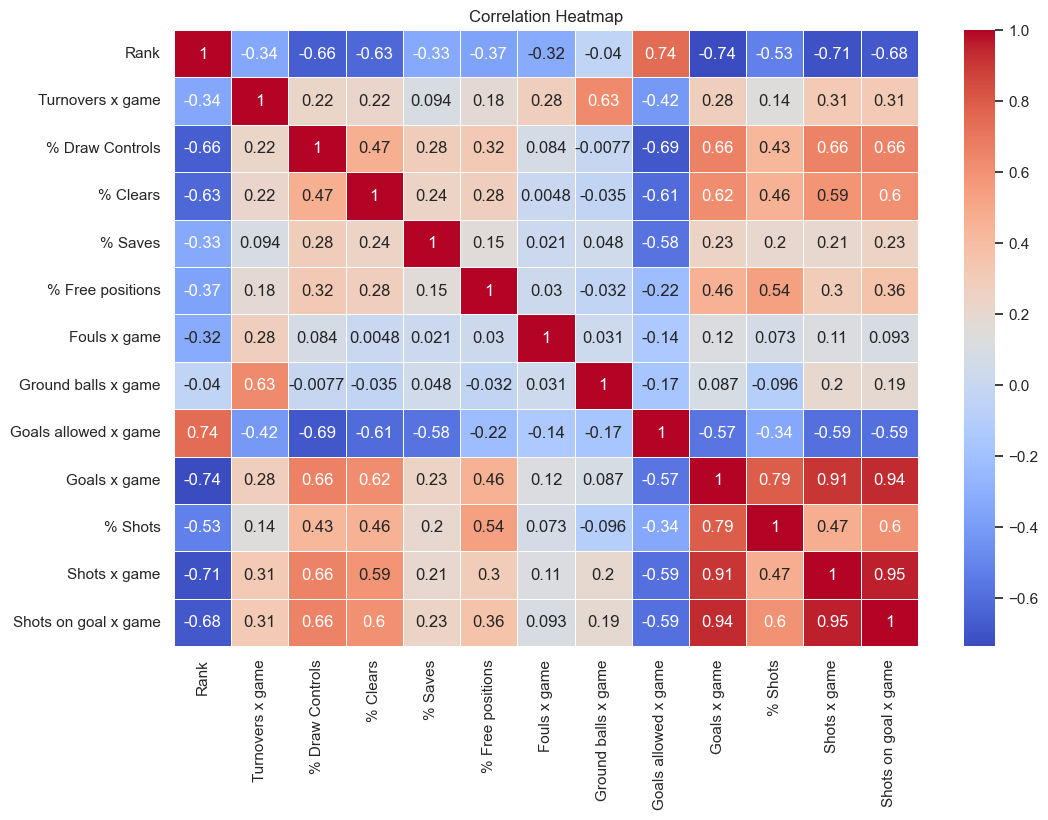

In [134]:

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [135]:
subset = final_df[['Rank', 'Turnovers x game','% Draw Controls','% Clears', '% Saves','Ground balls x game']]
subset


,Rank,Turnovers x game,% Draw Controls,% Clears,% Saves,Ground balls x game
0,1,8.27,0.572,0.924,0.472,15.32
1,2,7.52,0.534,0.911,0.446,13.35
2,3,7.62,0.555,0.874,0.487,15.52
3,4,12.65,0.616,0.887,0.505,17.87
5,6,8.95,0.559,0.918,0.477,15.82
...,...,...,...,...,...,...
119,120,7.86,0.387,0.819,0.436,17.07
120,121,8.00,0.496,0.755,0.403,18.06
121,122,5.44,0.472,0.762,0.406,11.19
123,124,6.46,0.401,0.717,0.392,13.85


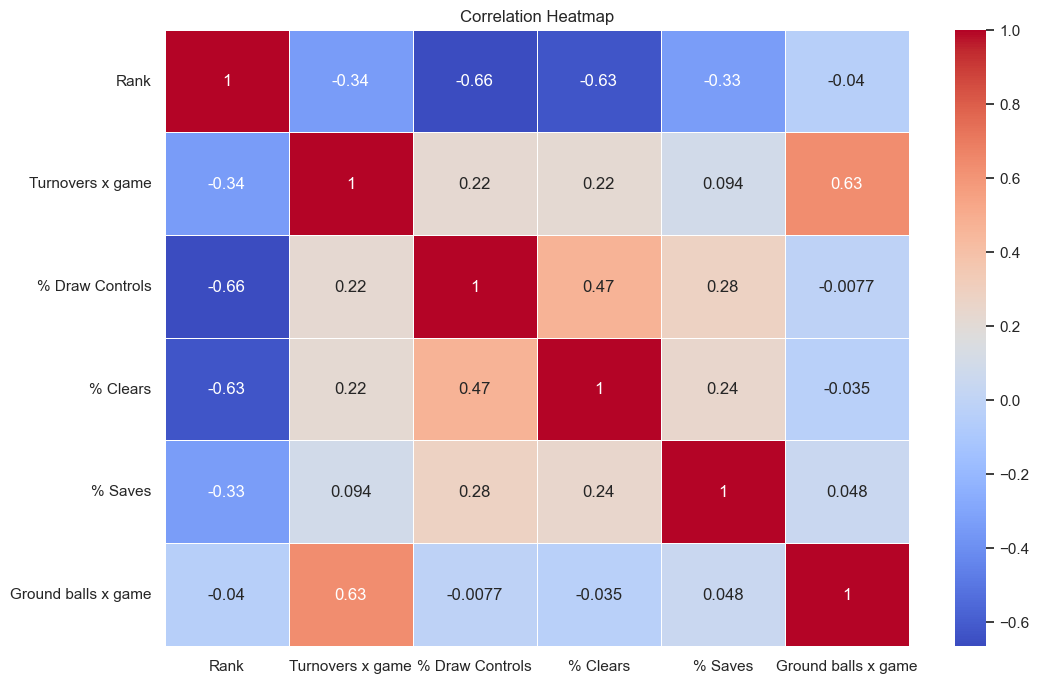

In [136]:
correlation_matrix = subset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [137]:
conference_stats = final_df.groupby("Conference").mean()

In [138]:
conference_stats

,Rank,Turnovers x game,% Draw Controls,% Clears,% Saves,% Free positions,Fouls x game,Ground balls x game,Goals allowed x game,Goals x game,% Shots,Shots x game,Shots on goal x game
Conference,,,,,,,,,,,,,
AAC,44.142857,7.847143,0.495714,0.877000,0.445714,0.409000,18.311429,15.855714,10.810000,11.597143,0.421714,27.302857,20.334286
ACC,29.555556,7.845556,0.531556,0.892667,0.431000,0.479667,21.936667,14.130000,11.085556,13.347778,0.448333,29.504444,21.626667
ASUN,72.500000,7.870000,0.518667,0.815167,0.424000,0.415333,14.561667,16.566667,12.076667,12.511667,0.410500,30.231667,22.195000
America East,60.571429,7.980000,0.489857,0.879143,0.410286,0.451143,17.307143,16.405714,12.431429,12.578571,0.438429,28.718571,21.448571
Atlantic 10,77.300000,7.401000,0.481700,0.869800,0.397600,0.441600,15.031000,16.025000,12.908000,11.780000,0.433600,26.894000,20.062000
Big East,42.714286,8.874286,0.517571,0.840000,0.442857,0.452857,19.761429,16.202857,12.217143,12.230000,0.425857,28.720000,21.358571
Big South,84.666667,9.643333,0.457556,0.842889,0.399778,0.401778,16.585556,16.683333,13.704444,11.418889,0.420556,26.926667,19.812222
Big Ten,21.000000,8.386667,0.521333,0.875667,0.460833,0.437333,20.653333,15.525000,10.205000,12.190000,0.422000,28.793333,21.076667
CAA,51.375000,8.083750,0.499875,0.865500,0.423500,0.427750,19.507500,15.895000,11.601250,11.545000,0.406750,28.340000,20.611250


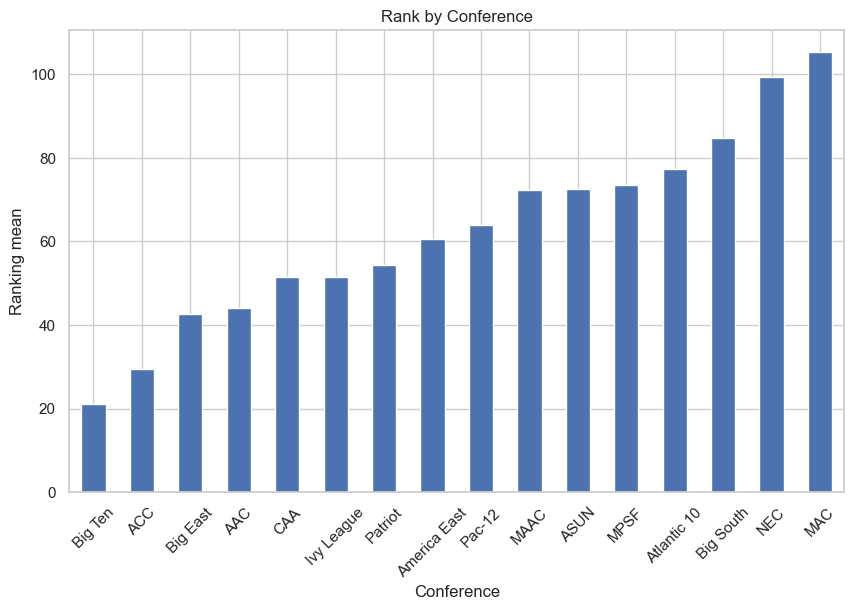

In [139]:
# Sort the DataFrame by the statistic you want to display (e.g., % Shots)
conference_stats_sorted = conference_stats.sort_values(by="Rank")

# Create a bar chart with sorted data
plt.figure(figsize=(10, 6))
conference_stats_sorted["Rank"].plot(kind="bar", rot=45)
plt.title("Rank by Conference")
plt.ylabel("Ranking mean")
plt.show()

In [140]:
conference_counts = df.groupby("Conference")["Team"].nunique().reset_index()
conference_counts = conference_counts.rename(columns={"Team": "Number of teams"})
conference_counts = conference_counts.sort_values(by="Number of teams")
print(conference_counts)

        Conference  Number of teams
9   DI Independent                1
13            MPSF                2
15          Pac-12                6
0              AAC                7
12             MAC                7
3     America East                7
5         Big East                7
7          Big Ten                7
10      Ivy League                8
8              CAA                8
2             ASUN                8
11            MAAC                9
14             NEC                9
4      Atlantic 10               10
1              ACC               10
6        Big South               10
16         Patriot               10


In [141]:
subset_deffense = final_df[['Rank', 'Turnovers x game','% Clears', '% Saves','Goals allowed x game']]

In [142]:
subset_attack = final_df[['Rank', 'Turnovers x game','% Clears', '% Saves','Goals allowed x game']]